2024-01-29 01:04:21.942461: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 01:04:21.974005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 01:04:21.974038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 01:04:21.974885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 01:04:21.979663: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 01:04:21.980037: I tensorflow/core/platform/cpu_feature_guard.cc:1

1/1 [==============================] - 0s 39ms/step


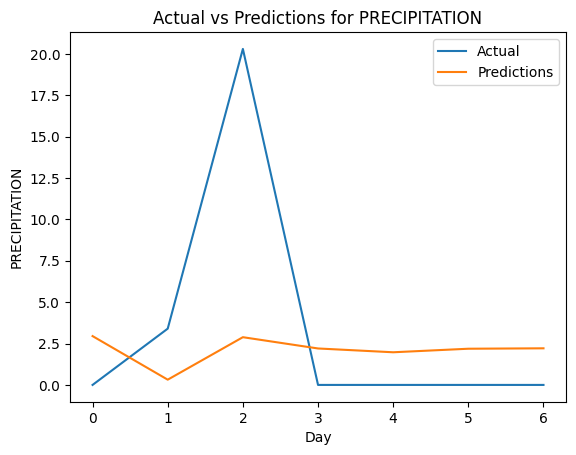

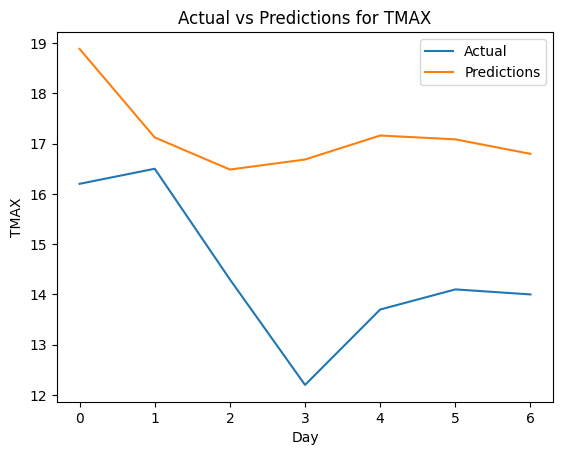

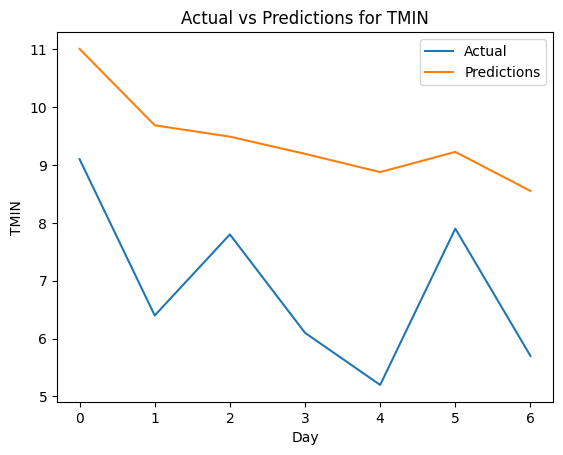

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

base_path = Path("../")
data_dir_path = base_path.joinpath("data/final_IMGW")

# Load 30 days data
data_30d_file_path = data_dir_path.joinpath("dane30d_10-2023.csv")
data_30d = pd.read_csv(data_30d_file_path, index_col="DATE")
# Load data to array of shape (1, 30, 3)
model_data = np.empty((1, 30, 3))
model_data[0] = data_30d[['PRECIPITATION', 'TMAX', 'TMIN']].iloc[:30].values

# Load 7 days data
data_7d_file_path = data_dir_path.joinpath("dane7d_11-2023.csv")
data_7d = pd.read_csv(data_7d_file_path, index_col="DATE")
# Load true prediction data to array of shape (7, 3)
true_weather = np.empty((7, 3))
true_weather = data_7d[['PRECIPITATION', 'TMAX', 'TMIN']].iloc[:7].values

# Load model
model = load_model('2Layers_Linear-saved.h5')

predicted_weather = model.predict(model_data)

# Reshape the predictions to format (7 days, 3 features)
predicted_weather = predicted_weather.reshape(7, 3)

# Plot for each feature
features = ['PRECIPITATION', 'TMAX', 'TMIN']
for i, feature in enumerate(features):
    plt.figure()
    plt.plot(true_weather[:, i], label='Actual')
    plt.plot(predicted_weather[:, i], label='Predictions')
    plt.title(f'Actual vs Predictions for {feature}')
    plt.xlabel('Day')
    plt.ylabel(feature)
    plt.legend()
    plt.show()
